$
\frac{arg 1}{arg 2} \\
x^2\\
e^{i\pi}\\
A_i\\
B_{ij}\\
\sqrt[n]{arg}	
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, prange

Set the lists and define temperature at right boundary

In [2]:
u0 = 5
u = np.empty([101, 101])

x_list = np.linspace(0, 1, 101)
t_list = np.linspace(0, 1, 101)
dt = t_list[-1]/(len(t_list)-1)

Define the function

In [3]:
@jit
def eval_analytic_1d(u):
    for n in prange(0, 101):
        for i in prange(0, 101):
            u[n,i] = u0 * (1-x_list[i]) + (2*u0/np.pi) * np.sin(np.pi*x_list[i]) * np.exp(-np.pi**2 * t_list[n])
    return u

eval_analytic_1d(u)

array([[5.00000000e+00, 5.04998355e+00, 5.09986843e+00, ...,
        2.99868431e-01, 1.49983551e-01, 3.89817183e-16],
       [5.00000000e+00, 5.04058690e+00, 5.08108441e+00, ...,
        2.81084407e-01, 1.40586903e-01, 3.53181406e-16],
       [5.00000000e+00, 5.03207337e+00, 5.06406574e+00, ...,
        2.64065743e-01, 1.32073370e-01, 3.19988731e-16],
       ...,
       [5.00000000e+00, 4.95000630e+00, 4.90001259e+00, ...,
        1.00012594e-01, 5.00063000e-02, 2.45624986e-20],
       [5.00000000e+00, 4.95000571e+00, 4.90001141e+00, ...,
        1.00011410e-01, 5.00057079e-02, 2.22540673e-20],
       [5.00000000e+00, 4.95000517e+00, 4.90001034e+00, ...,
        1.00010338e-01, 5.00051715e-02, 2.01625868e-20]])

# 2D plots
Note: time must satisfy condition: t >= 1/pi^2 for reasons left as an exercise
for the reader

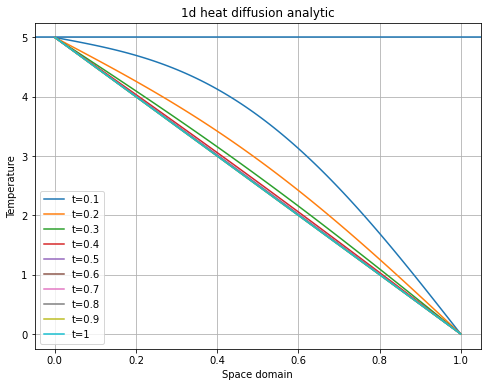

In [4]:
fig = plt.figure(figsize=(8,6))
num_of_slice = 10
plt.axhline(y=5)
for i in range(10, len(u), len(u)//num_of_slice ):
    plt.plot(x_list, u[i], label=f't={i*dt :.1g}')

plt.title('1d heat diffusion analytic')
plt.xlabel('Space domain')
plt.ylabel('Temperature')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 3D plots

size of t_list: (101, 101), size of x_list: (101, 101), size of u: (101, 101)


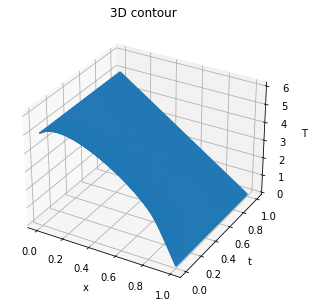

In [5]:
x_list, t_list = np.meshgrid(x_list,t_list)
print(f'size of t_list: {t_list.shape}, size of x_list: {x_list.shape}, size of u: {u.shape}')

fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')

ax.plot_wireframe(x_list, t_list, u, rcount=t_list.shape[1], ccount=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('T')
ax.set_title('3D contour')
plt.show()

# 3D contour

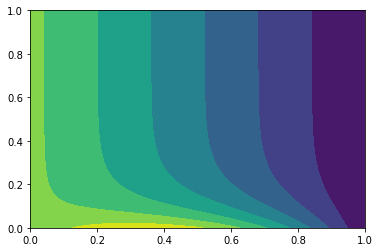

In [6]:
plt.contourf(x_list, t_list, u)
plt.show()